In [105]:
#!pip install mahotas

In [106]:
import sklearn
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, Dropout, Flatten, MaxPooling2D, concatenate
import numpy as np
import mahotas
from sklearn.metrics import classification_report, accuracy_score, cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import class_weight
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping



In [107]:
#!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz

In [108]:
#!tar -xzvf "flower_photos.tgz" -C "." > xx
#print("Unzipped")

In [109]:
import cv2
import os
import sklearn
image_size = tuple((64, 64))

def load_img(indir):
    samples = []
    labels = []
    for class_dir in os.listdir(indir):
        the_class = class_dir
        for file in os.listdir(indir+'/'+class_dir):
            image = cv2.imread("{}/{}/{}".format(indir,class_dir,file))
            #image = preprocess_input(image)
            image = cv2.resize(image, image_size)
            samples.append(image)
            labels.append(the_class)
    samples = np.array(samples)
    labels = np.array(labels)
    return samples,labels
samples, labels = load_img('flower_photos')
samples,labels = sklearn.utils.shuffle(samples,labels)
print('loaded',len(samples),' samples')
print('classes',set(labels))


loaded 3670  samples
classes {'roses', 'sunflowers', 'tulips', 'daisy', 'dandelion'}


In [110]:



# feature-descriptor-1: Hu Moments
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

def fd_haralick(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    return haralick

def fd_histogram(image, mask=None):
    bins=8
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    return hist.flatten()


In [111]:
new_samples = []
for i,image in enumerate(samples):
    fv_hu_moments = fd_hu_moments(image)
    fv_haralick   = fd_haralick(image)
    fv_histogram  = fd_histogram(image)
    if(i%500==0): print(i,'/',len(samples))
    features = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
    new_samples.append(features)
samples = np.array(new_samples)

#np.savetxt('samples.csv',fsamples) #save it if you want to reuse it!
print(samples.shape)

0 / 3670
500 / 3670
1000 / 3670
1500 / 3670
2000 / 3670
2500 / 3670
3000 / 3670
3500 / 3670
(3670, 532)


In [112]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
print(np.min(samples),np.max(samples))
samples = scaler.fit_transform(samples)
print(np.min(samples),np.max(samples))
print(samples.shape)
dense_samples = samples

-0.6241640388357443 42116.99917305573
0.0 1.0000000000000004
(3670, 532)


In [113]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = np.array(labels,dtype=float)
print(labels.shape)

(3670, 5)


In [114]:
dense_model = Sequential()
dense_model.add(Dense(250, input_dim=532, activation='relu'))
dense_model.add(Dense(250, activation='relu'))
dense_model.add(Dense(250, activation='relu'))
dense_model.add(Dense(5, activation='softmax'))
dense_model.summary()
dense_model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 250)               133250    
                                                                 
 dense_33 (Dense)            (None, 250)               62750     
                                                                 
 dense_34 (Dense)            (None, 250)               62750     
                                                                 
 dense_35 (Dense)            (None, 5)                 1255      
                                                                 
Total params: 260005 (1015.64 KB)
Trainable params: 260005 (1015.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [115]:
# import sklearn.model_selection
# (trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples,labels)

In [116]:
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,cohen_kappa_score

# modelResults = dense_model.predict(testSamples)
# print(modelResults.shape)
# print(testLabels.shape)

# print(confusion_matrix(testLabels.argmax(axis=1), modelResults.argmax(axis=1)))
# print(classification_report(testLabels.argmax(axis=1), modelResults.argmax(axis=1)))
# accuracy = accuracy_score(testLabels.argmax(axis=1), modelResults.argmax(axis=1))
# print("Accuracy: {:.2f}".format(accuracy))
# print("Cohen's Kappa: {:.2f}".format(cohen_kappa_score(testLabels.argmax(axis=1), modelResults.argmax(axis=1))))

In [117]:
# Feature extraction methods
#- see: https://gogul.dev/software/image-classification-python

In [118]:
#------------------------------------------------#
#------------------------------------------------#
#------------------------------------------------#
#Second Network----------------------------------#
#------------------------------------------------#
#------------------------------------------------#
#------------------------------------------------#

In [119]:
import cv2
import os
def load_img(indir):
    samples = []
    labels = []
    for class_dir in os.listdir(indir):
        if not os.path.isdir(indir+'/'+class_dir):
          continue
        print("Loading:",class_dir)
        the_class = class_dir
        for file in os.listdir(indir+'/'+class_dir):
            image = cv2.imread("{}/{}/{}".format(indir,class_dir,file))
            image = cv2.resize(image, (64,64))
            samples.append(image)
            labels.append(the_class)
    samples = np.array(samples)
    labels = np.array(labels)
    return samples,labels
samples, labels = load_img('flower_photos')
print('loaded',len(samples),' samples')
print('classes',set(labels))
org_samples = samples
org_labels = labels

Loading: dandelion
Loading: roses
Loading: tulips
Loading: .ipynb_checkpoints
Loading: daisy
Loading: sunflowers
loaded 3670  samples
classes {'roses', 'sunflowers', 'tulips', 'daisy', 'dandelion'}


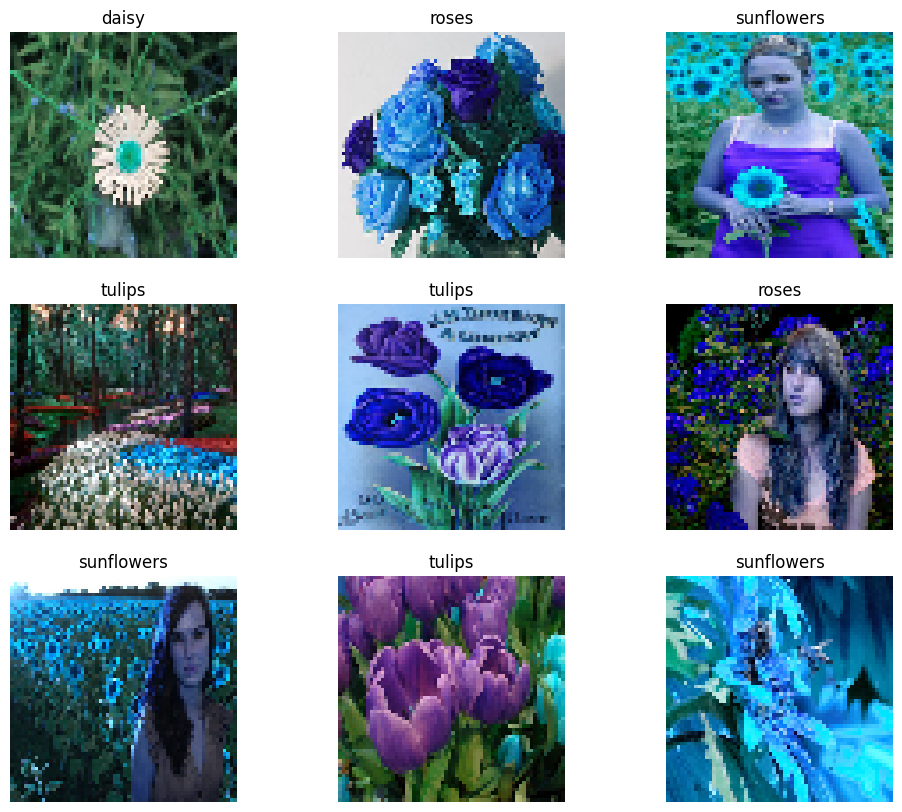

In [120]:
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(12, 10))
for i in range(9):
    n = random.randrange(len(samples))
    plt.subplot(3, 3, i + 1)
    plt.imshow(samples[n])
    plt.title(labels[n])
    plt.axis("off")

In [121]:
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same",input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dense(5))
model.add(Activation("softmax"))

model.summary()
#optimizer = tf.keras.optimizers.RMSprop(0.0001, decay = 1e-6)
optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 64, 64, 16)        448       
                                                                 
 batch_normalization_8 (Bat  (None, 64, 64, 16)        64        
 chNormalization)                                                
                                                                 
 activation_16 (Activation)  (None, 64, 64, 16)        0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 32, 32, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 batch_normalization_9 (Bat  (None, 32, 32, 32)       

In [122]:
samples = org_samples.copy()
labels = org_labels.copy()
print("Samples shape before",samples.shape)

# flatten samples
samples = np.reshape(samples,newshape=(3670,-1))
print("Samples shape flattened",samples.shape)

Samples shape before (3670, 64, 64, 3)
Samples shape flattened (3670, 12288)


In [123]:
# one-hot labels
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print("Labels shape",labels.shape)
labels = labels.astype(float)

Labels shape (3670, 5)


In [124]:
samples = org_samples
print(samples.shape)
import sklearn.model_selection
(trainSamples, testSamples, trainLabels, testLabels) = sklearn.model_selection.train_test_split(samples,labels,random_state=22)
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

(3670, 64, 64, 3)


In [125]:
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
# testResults = model.predict(testSamples)
# print(modelResults.shape)
# print(testLabels.shape)

# print(confusion_matrix(testLabels.argmax(axis=1), testResults.argmax(axis=1)))
# print(classification_report(testLabels.argmax(axis=1), testResults.argmax(axis=1)))
# print("Cohen's Kappa: {}".format(cohen_kappa_score(testLabels.argmax(axis=1), testResults.argmax(axis=1))))
# print("Accuracy: ",accuracy_score(testLabels.argmax(axis=1), testResults.argmax(axis=1)))


In [126]:
#------------------------------------------------#
#------------------------------------------------#
#------------------------------------------------#
#CombinedNetwork---------------------------------#
#------------------------------------------------#
#------------------------------------------------#
#------------------------------------------------#

In [127]:
combined = concatenate([dense_model.output, model.output])
combined = Dense(16, activation="sigmoid")(combined)
combined = Dense(5, activation="sigmoid")(combined)

model = Model(inputs=[dense_model.input, model.input], outputs=combined)

print(model.summary())

model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 conv2d_8_input (InputLayer  [(None, 64, 64, 3)]          0         []                            
 )                                                                                                
                                                                                                  
 conv2d_8 (Conv2D)           (None, 64, 64, 16)           448       ['conv2d_8_input[0][0]']      
                                                                                                  
 batch_normalization_8 (Bat  (None, 64, 64, 16)           64        ['conv2d_8[0][0]']            
 chNormalization)                                                                                 
                                                                                            

In [128]:
EPOCHS = 100
BATCH=50
model.fit([dense_samples,samples], labels, batch_size=BATCH, epochs=EPOCHS,
          validation_data=[[dense_samples,samples],labels])

Epoch 1/100
74/74 [==============================] - 33s 410ms/step - loss: 1.6161 - accuracy: 0.2253 - val_loss: 1.6003 - val_accuracy: 0.2447
Epoch 2/100
74/74 [==============================] - 30s 408ms/step - loss: 1.6009 - accuracy: 0.2447 - val_loss: 1.5997 - val_accuracy: 0.2447
Epoch 3/100
74/74 [==============================] - 30s 412ms/step - loss: 1.6006 - accuracy: 0.2447 - val_loss: 1.5998 - val_accuracy: 0.2447
Epoch 4/100
74/74 [==============================] - 30s 401ms/step - loss: 1.5989 - accuracy: 0.2447 - val_loss: 1.5947 - val_accuracy: 0.2447
Epoch 5/100
74/74 [==============================] - 30s 406ms/step - loss: 1.5958 - accuracy: 0.2518 - val_loss: 1.5909 - val_accuracy: 0.2621
Epoch 6/100
74/74 [==============================] - 29s 396ms/step - loss: 1.5914 - accuracy: 0.2708 - val_loss: 1.5880 - val_accuracy: 0.2700
Epoch 7/100
74/74 [==============================] - 30s 402ms/step - loss: 1.5886 - accuracy: 0.2684 - val_loss: 1.5826 - val_accuracy:

In [129]:
results = model.predict([dense_samples,samples])
print(confusion_matrix(labels.argmax(axis=1), results.argmax(axis=1)))
print(classification_report(labels.argmax(axis=1), results.argmax(axis=1)))
print("Accuracy: {:.2f}".format(accuracy_score(labels.argmax(axis=1), results.argmax(axis=1))))
print("Cohen's Kappa {:.2f}".format(cohen_kappa_score(labels.argmax(axis=1), results.argmax(axis=1))))

115/115 [==============================] - 6s 47ms/step
[[  0   7   6 619   1]
 [  0 722   0 162  14]
 [  0   3 464 174   0]
 [  0   6   8 685   0]
 [  0  11   0  72 716]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       633
           1       0.96      0.80      0.88       898
           2       0.97      0.72      0.83       641
           3       0.40      0.98      0.57       699
           4       0.98      0.90      0.94       799

    accuracy                           0.70      3670
   macro avg       0.66      0.68      0.64      3670
weighted avg       0.69      0.70      0.67      3670

Accuracy: 0.70
Cohen's Kappa 0.63


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
